In [7]:
!apt-get update && apt-get install ffmpeg libsm6 libxext6  -y

Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [48.4 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8183 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [243 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [17.4 kB]
Fetched 8652 kB in 1s (7075 kB/s)                     
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1.1).
libxext6 set to manually installed.
The following additional packages will be installed:
  alsa-topology-conf alsa-ucm-conf i965-va-driver intel-media-va-driver
  libaacs0 libasound2 libasound2-data libass9 libasyncn

In [8]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from tqdm.auto import tqdm 
import glob as gb 

from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam

2023-09-28 15:11:17.434204: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 15:11:17.473225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 15:11:17.473260: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 15:11:17.473289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 15:11:17.480722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 15:11:17.481246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [9]:
def walk_through_data(dir_path) : 
    for dirpath , dirnames , filenames in tqdm(os.walk(dir_path)) : 
        print(f"There are {len(dirnames)} directions and {len(filenames)} images in {dirpath}")

In [10]:
train_path = 'dataset/train'
val_path = 'dataset/valid'
test_path = 'dataset/test'

In [11]:
walk_through_data(train_path)

0it [00:00, ?it/s]

There are 38 directions and 0 images in dataset/train


2it [00:01,  1.17it/s]

There are 0 directions and 1926 images in dataset/train/Tomato___healthy


3it [00:03,  1.13s/it]

There are 0 directions and 1851 images in dataset/train/Tomato___Late_blight


4it [00:05,  1.41s/it]

There are 0 directions and 1987 images in dataset/train/Apple___Black_rot


5it [00:06,  1.43s/it]

There are 0 directions and 1816 images in dataset/train/Blueberry___healthy


6it [00:08,  1.47s/it]

There are 0 directions and 1790 images in dataset/train/Tomato___Tomato_mosaic_virus


7it [00:09,  1.41s/it]

There are 0 directions and 1745 images in dataset/train/Tomato___Septoria_leaf_spot


8it [00:11,  1.52s/it]

There are 0 directions and 1961 images in dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus


9it [00:12,  1.54s/it]

There are 0 directions and 1882 images in dataset/train/Tomato___Leaf_Mold


10it [00:14,  1.60s/it]

There are 0 directions and 1859 images in dataset/train/Corn_(maize)___healthy


11it [00:16,  1.68s/it]

There are 0 directions and 2010 images in dataset/train/Orange___Haunglongbing_(Citrus_greening)


12it [00:17,  1.63s/it]

There are 0 directions and 1760 images in dataset/train/Apple___Cedar_apple_rust


13it [00:19,  1.68s/it]

There are 0 directions and 1988 images in dataset/train/Pepper,_bell___healthy


14it [00:21,  1.69s/it]

There are 0 directions and 1939 images in dataset/train/Potato___Early_blight


15it [00:22,  1.56s/it]

There are 0 directions and 1838 images in dataset/train/Peach___Bacterial_spot


16it [00:23,  1.44s/it]

There are 0 directions and 1683 images in dataset/train/Cherry_(including_sour)___Powdery_mildew


17it [00:25,  1.52s/it]

There are 0 directions and 1907 images in dataset/train/Corn_(maize)___Common_rust_


18it [00:27,  1.53s/it]

There are 0 directions and 1781 images in dataset/train/Raspberry___healthy


19it [00:28,  1.56s/it]

There are 0 directions and 2008 images in dataset/train/Apple___healthy


20it [00:29,  1.47s/it]

There are 0 directions and 1826 images in dataset/train/Cherry_(including_sour)___healthy


21it [00:31,  1.53s/it]

There are 0 directions and 1920 images in dataset/train/Grape___Esca_(Black_Measles)


22it [00:33,  1.51s/it]

There are 0 directions and 1824 images in dataset/train/Strawberry___healthy


23it [00:34,  1.44s/it]

There are 0 directions and 1642 images in dataset/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


24it [00:36,  1.58s/it]

There are 0 directions and 2016 images in dataset/train/Apple___Apple_scab


25it [00:37,  1.59s/it]

There are 0 directions and 1908 images in dataset/train/Corn_(maize)___Northern_Leaf_Blight


26it [00:39,  1.59s/it]

There are 0 directions and 1888 images in dataset/train/Grape___Black_rot


27it [00:40,  1.55s/it]

There are 0 directions and 1827 images in dataset/train/Tomato___Target_Spot


28it [00:42,  1.50s/it]

There are 0 directions and 1702 images in dataset/train/Tomato___Bacterial_spot


29it [00:43,  1.56s/it]

There are 0 directions and 2022 images in dataset/train/Soybean___healthy


30it [00:45,  1.47s/it]

There are 0 directions and 1736 images in dataset/train/Squash___Powdery_mildew


31it [00:46,  1.47s/it]

There are 0 directions and 1728 images in dataset/train/Peach___healthy


32it [00:48,  1.51s/it]

There are 0 directions and 1939 images in dataset/train/Potato___Late_blight


33it [00:49,  1.49s/it]

There are 0 directions and 1824 images in dataset/train/Potato___healthy


34it [00:51,  1.46s/it]

There are 0 directions and 1692 images in dataset/train/Grape___healthy


35it [00:52,  1.42s/it]

There are 0 directions and 1774 images in dataset/train/Strawberry___Leaf_scorch


36it [00:53,  1.38s/it]

There are 0 directions and 1741 images in dataset/train/Tomato___Spider_mites Two-spotted_spider_mite


37it [00:55,  1.46s/it]

There are 0 directions and 1920 images in dataset/train/Tomato___Early_blight


38it [00:57,  1.52s/it]

There are 0 directions and 1913 images in dataset/train/Pepper,_bell___Bacterial_spot


39it [00:58,  1.49s/it]

There are 0 directions and 1722 images in dataset/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


In [48]:
walk_through_data(val_path)

2it [00:00, 13.14it/s]

There are 38 directions and 0 images in dataset/valid
There are 0 directions and 481 images in dataset/valid/Tomato___healthy


4it [00:00,  8.54it/s]

There are 0 directions and 463 images in dataset/valid/Tomato___Late_blight
There are 0 directions and 497 images in dataset/valid/Apple___Black_rot


6it [00:00,  9.72it/s]

There are 0 directions and 454 images in dataset/valid/Blueberry___healthy
There are 0 directions and 448 images in dataset/valid/Tomato___Tomato_mosaic_virus
There are 0 directions and 436 images in dataset/valid/Tomato___Septoria_leaf_spot


9it [00:00,  9.24it/s]

There are 0 directions and 490 images in dataset/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus
There are 0 directions and 470 images in dataset/valid/Tomato___Leaf_Mold


11it [00:01,  7.93it/s]

There are 0 directions and 465 images in dataset/valid/Corn_(maize)___healthy
There are 0 directions and 503 images in dataset/valid/Orange___Haunglongbing_(Citrus_greening)


13it [00:01,  8.14it/s]

There are 0 directions and 440 images in dataset/valid/Apple___Cedar_apple_rust
There are 0 directions and 497 images in dataset/valid/Pepper,_bell___healthy


18it [00:01, 14.22it/s]

There are 0 directions and 485 images in dataset/valid/Potato___Early_blight
There are 0 directions and 459 images in dataset/valid/Peach___Bacterial_spot
There are 0 directions and 421 images in dataset/valid/Cherry_(including_sour)___Powdery_mildew
There are 0 directions and 477 images in dataset/valid/Corn_(maize)___Common_rust_
There are 0 directions and 445 images in dataset/valid/Raspberry___healthy
There are 0 directions and 502 images in dataset/valid/Apple___healthy
There are 0 directions and 456 images in dataset/valid/Cherry_(including_sour)___healthy


23it [00:01, 16.97it/s]

There are 0 directions and 480 images in dataset/valid/Grape___Esca_(Black_Measles)
There are 0 directions and 456 images in dataset/valid/Strawberry___healthy
There are 0 directions and 410 images in dataset/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot


25it [00:02, 11.63it/s]

There are 0 directions and 504 images in dataset/valid/Apple___Apple_scab
There are 0 directions and 477 images in dataset/valid/Corn_(maize)___Northern_Leaf_Blight


27it [00:02, 10.82it/s]

There are 0 directions and 472 images in dataset/valid/Grape___Black_rot
There are 0 directions and 457 images in dataset/valid/Tomato___Target_Spot
There are 0 directions and 425 images in dataset/valid/Tomato___Bacterial_spot
There are 0 directions and 505 images in dataset/valid/Soybean___healthy
There are 0 directions and 434 images in dataset/valid/Squash___Powdery_mildew


34it [00:02, 16.93it/s]

There are 0 directions and 432 images in dataset/valid/Peach___healthy
There are 0 directions and 485 images in dataset/valid/Potato___Late_blight
There are 0 directions and 456 images in dataset/valid/Potato___healthy
There are 0 directions and 423 images in dataset/valid/Grape___healthy
There are 0 directions and 444 images in dataset/valid/Strawberry___Leaf_scorch


36it [00:02, 16.70it/s]

There are 0 directions and 435 images in dataset/valid/Tomato___Spider_mites Two-spotted_spider_mite
There are 0 directions and 480 images in dataset/valid/Tomato___Early_blight


39it [00:03, 12.11it/s]

There are 0 directions and 478 images in dataset/valid/Pepper,_bell___Bacterial_spot
There are 0 directions and 430 images in dataset/valid/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


In [13]:
walk_through_data(test_path)

3it [00:00, 106.94it/s]

There are 2 directions and 0 images in dataset/test
There are 0 directions and 33 images in dataset/test/test
There are 0 directions and 0 images in dataset/test/.ipynb_checkpoints


In [14]:
extension=[]
classes = [] 

for folder in tqdm(os.listdir(train_path)) : 
    
    if folder not in classes : 
        classes.append(folder) 
        
    for file in os.listdir(train_path + "/" + folder + "/") : 
        if os.path.isfile(train_path + "/" + folder + "/" + file) : 
            extension.append(os.path.splitext(file)[1])

100%|██████████| 38/38 [01:31<00:00,  2.40s/it]


In [15]:
print(len(extension) , np.unique(extension))

70295 ['.JPG' '.jpg']


In [16]:
len(classes)

38

In [17]:
dataset_labels = {key : value for value , key in enumerate(classes)}
dataset_labels

{'Tomato___healthy': 0,
 'Tomato___Late_blight': 1,
 'Apple___Black_rot': 2,
 'Blueberry___healthy': 3,
 'Tomato___Tomato_mosaic_virus': 4,
 'Tomato___Septoria_leaf_spot': 5,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 6,
 'Tomato___Leaf_Mold': 7,
 'Corn_(maize)___healthy': 8,
 'Orange___Haunglongbing_(Citrus_greening)': 9,
 'Apple___Cedar_apple_rust': 10,
 'Pepper,_bell___healthy': 11,
 'Potato___Early_blight': 12,
 'Peach___Bacterial_spot': 13,
 'Cherry_(including_sour)___Powdery_mildew': 14,
 'Corn_(maize)___Common_rust_': 15,
 'Raspberry___healthy': 16,
 'Apple___healthy': 17,
 'Cherry_(including_sour)___healthy': 18,
 'Grape___Esca_(Black_Measles)': 19,
 'Strawberry___healthy': 20,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 21,
 'Apple___Apple_scab': 22,
 'Corn_(maize)___Northern_Leaf_Blight': 23,
 'Grape___Black_rot': 24,
 'Tomato___Target_Spot': 25,
 'Tomato___Bacterial_spot': 26,
 'Soybean___healthy': 27,
 'Squash___Powdery_mildew': 28,
 'Peach___healthy': 29,
 'Pota

In [18]:
def getlabel(n) : 
    for x , y in dataset_labels.items() : 
        if n==y : 
            return x

In [19]:
img_size = 100

In [20]:
train_images = [] 
train_labels = [] 

for folder in tqdm(os.listdir(train_path)) : 
    files = gb.glob(pathname = str(train_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(train_path + "/" + folder + "/*.jpg"))
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size))
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        train_images.append(list(img)) 
        train_labels.append(dataset_labels[folder])

100%|██████████| 38/38 [08:39<00:00, 13.68s/it]


In [21]:
np.array(train_images).shape , np.array(train_labels).shape

((70295, 100, 100, 3), (70295,))

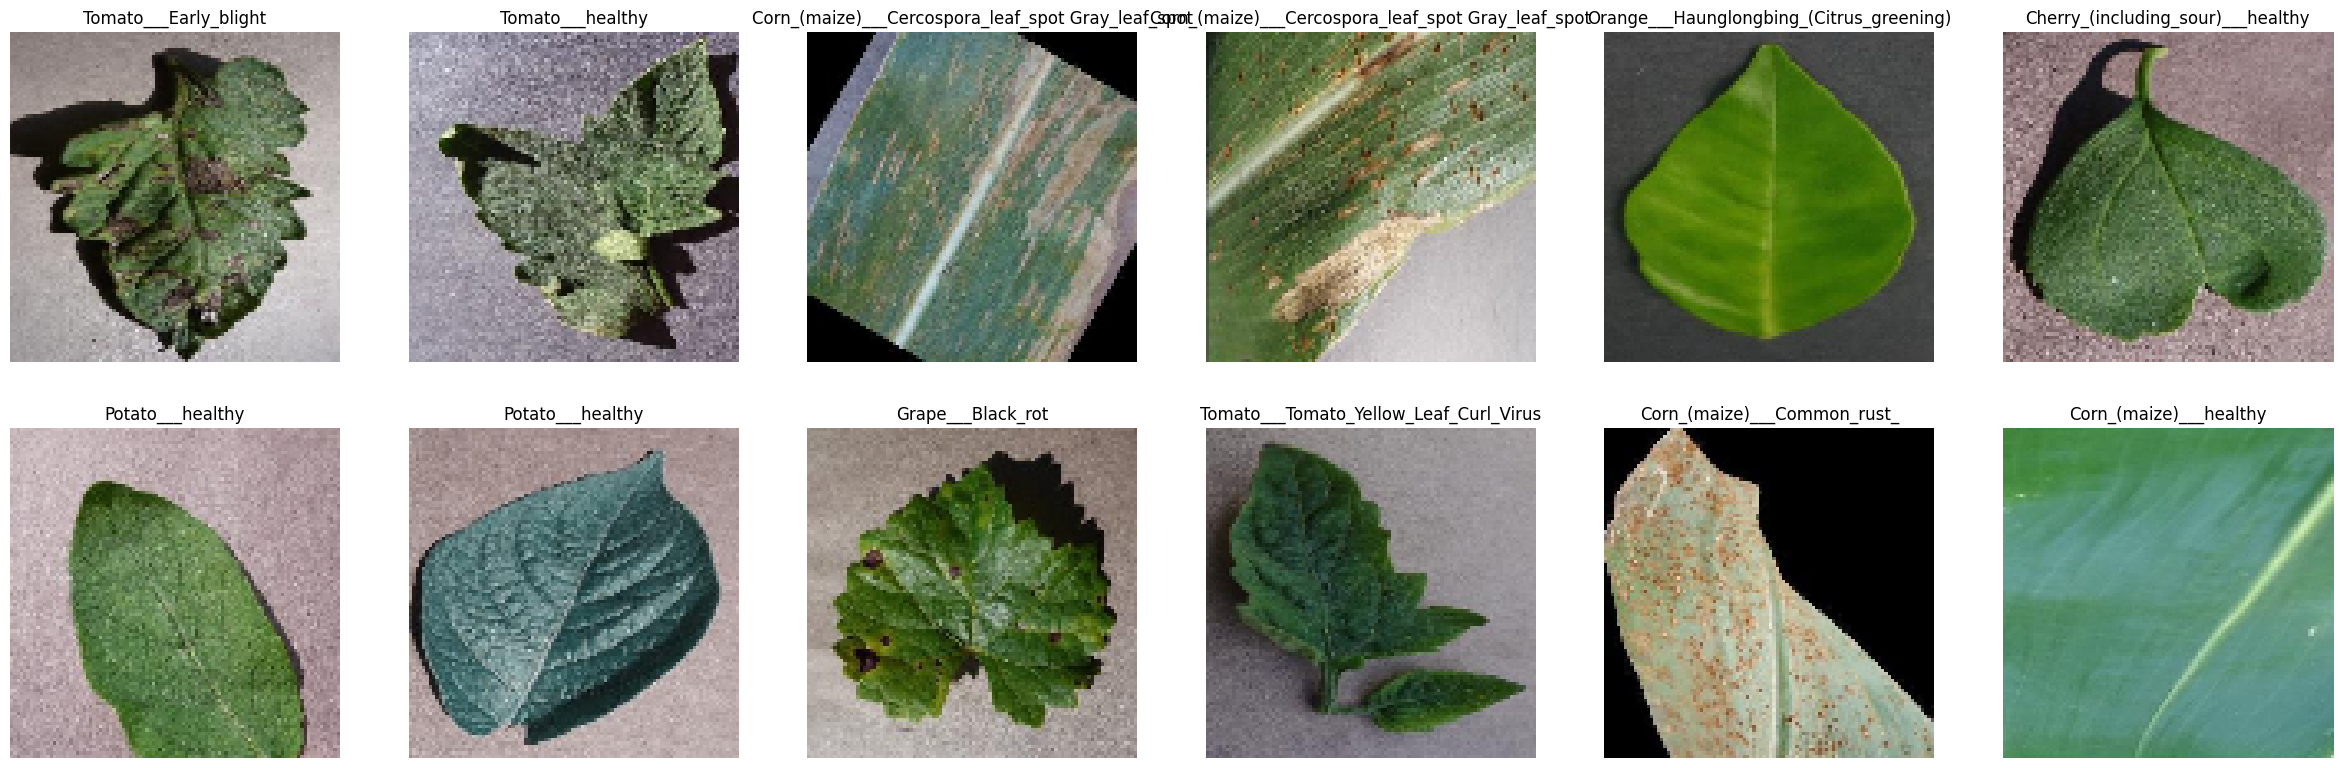

In [22]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0 , len(train_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])
    plt.axis('off')
    plt.title(getlabel(train_labels[i]))

In [23]:
val_images = [] 
val_labels = [] 

for folder in tqdm(os.listdir(val_path)) : 
    files = gb.glob(pathname = str(val_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(val_path + "/" + folder + "/*.jpg"))
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        val_images.append(list(img))
        val_labels.append(dataset_labels[folder])

100%|██████████| 38/38 [02:51<00:00,  4.52s/it]


In [24]:
np.array(val_images).shape , np.array(val_labels).shape

((17572, 100, 100, 3), (17572,))

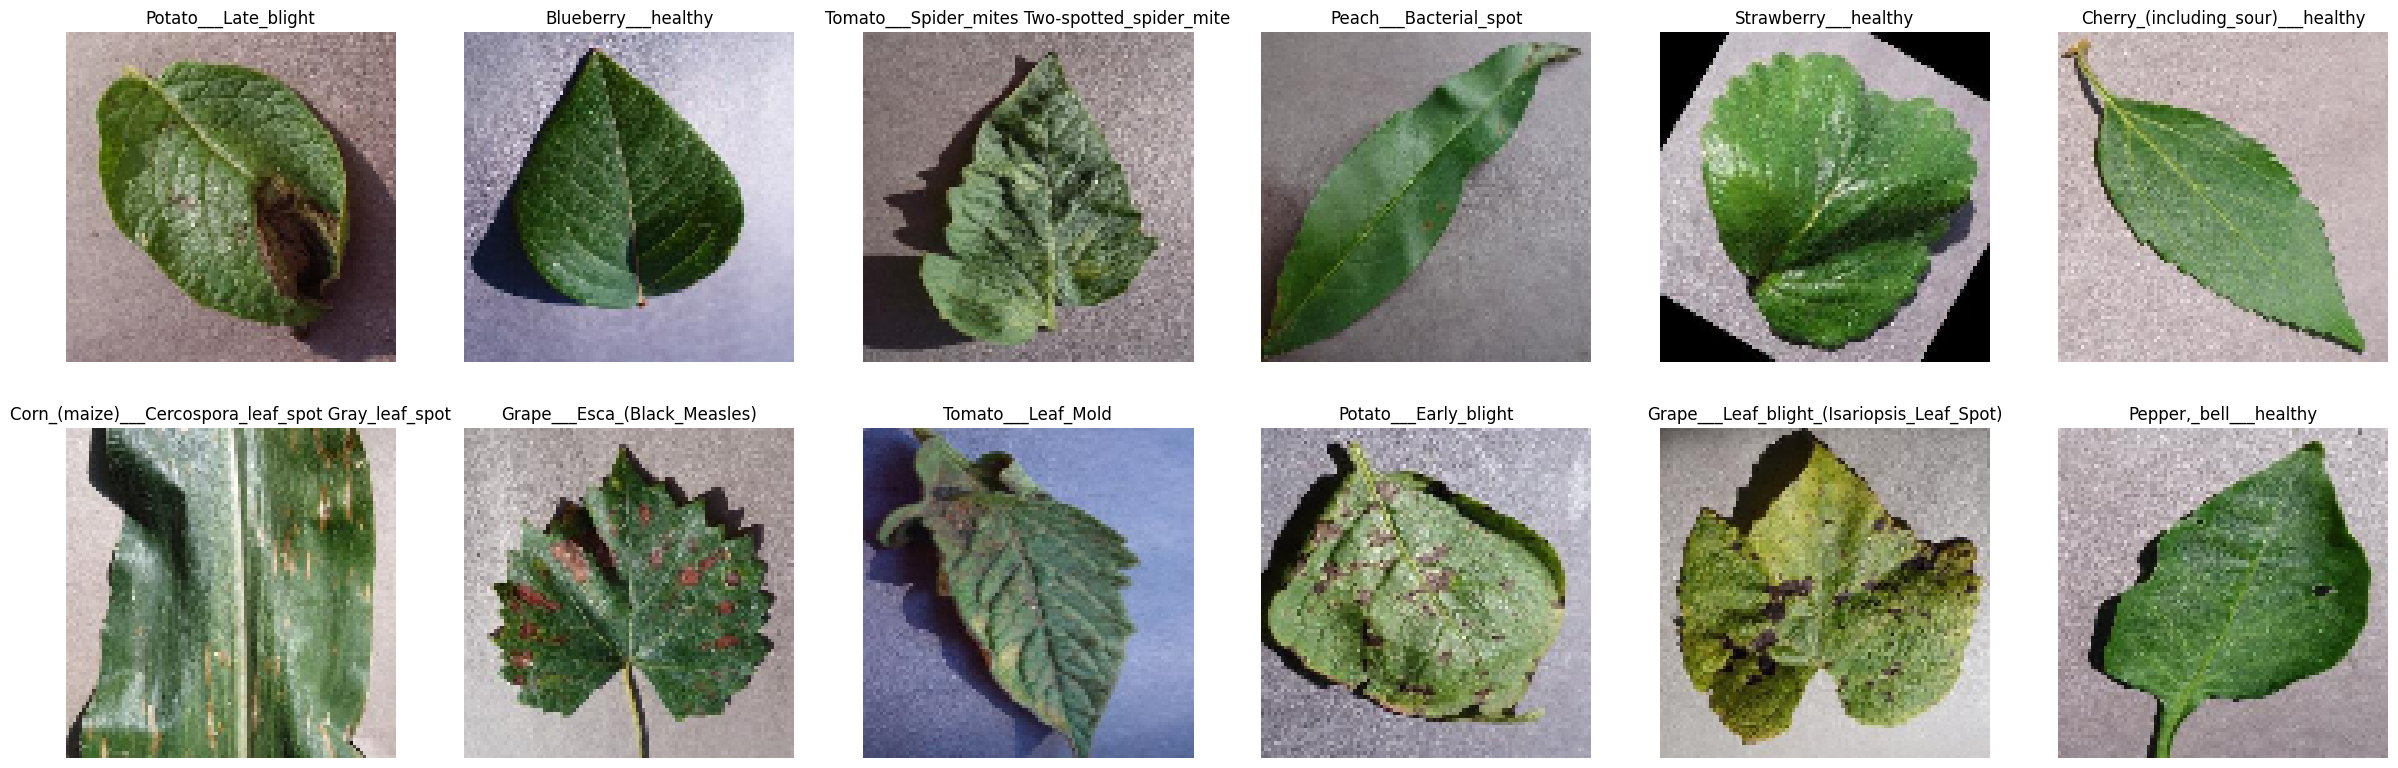

In [25]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0 , len(val_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])
    plt.axis('off')
    plt.title(getlabel(val_labels[i]))

In [26]:
test_images = [] 

for folder in tqdm(os.listdir(test_path)) : 
    files = gb.glob(pathname = str(test_path + "/" + folder + "/*.JPG")) + gb.glob(pathname = str(test_path + "/" + folder + "/*.jpg")) 
    for file in files : 
        img = cv2.imread(file) 
        img = cv2.resize(img , (img_size , img_size)) 
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        test_images.append(list(img))

100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


In [27]:
np.array(test_images).shape

(33, 100, 100, 3)

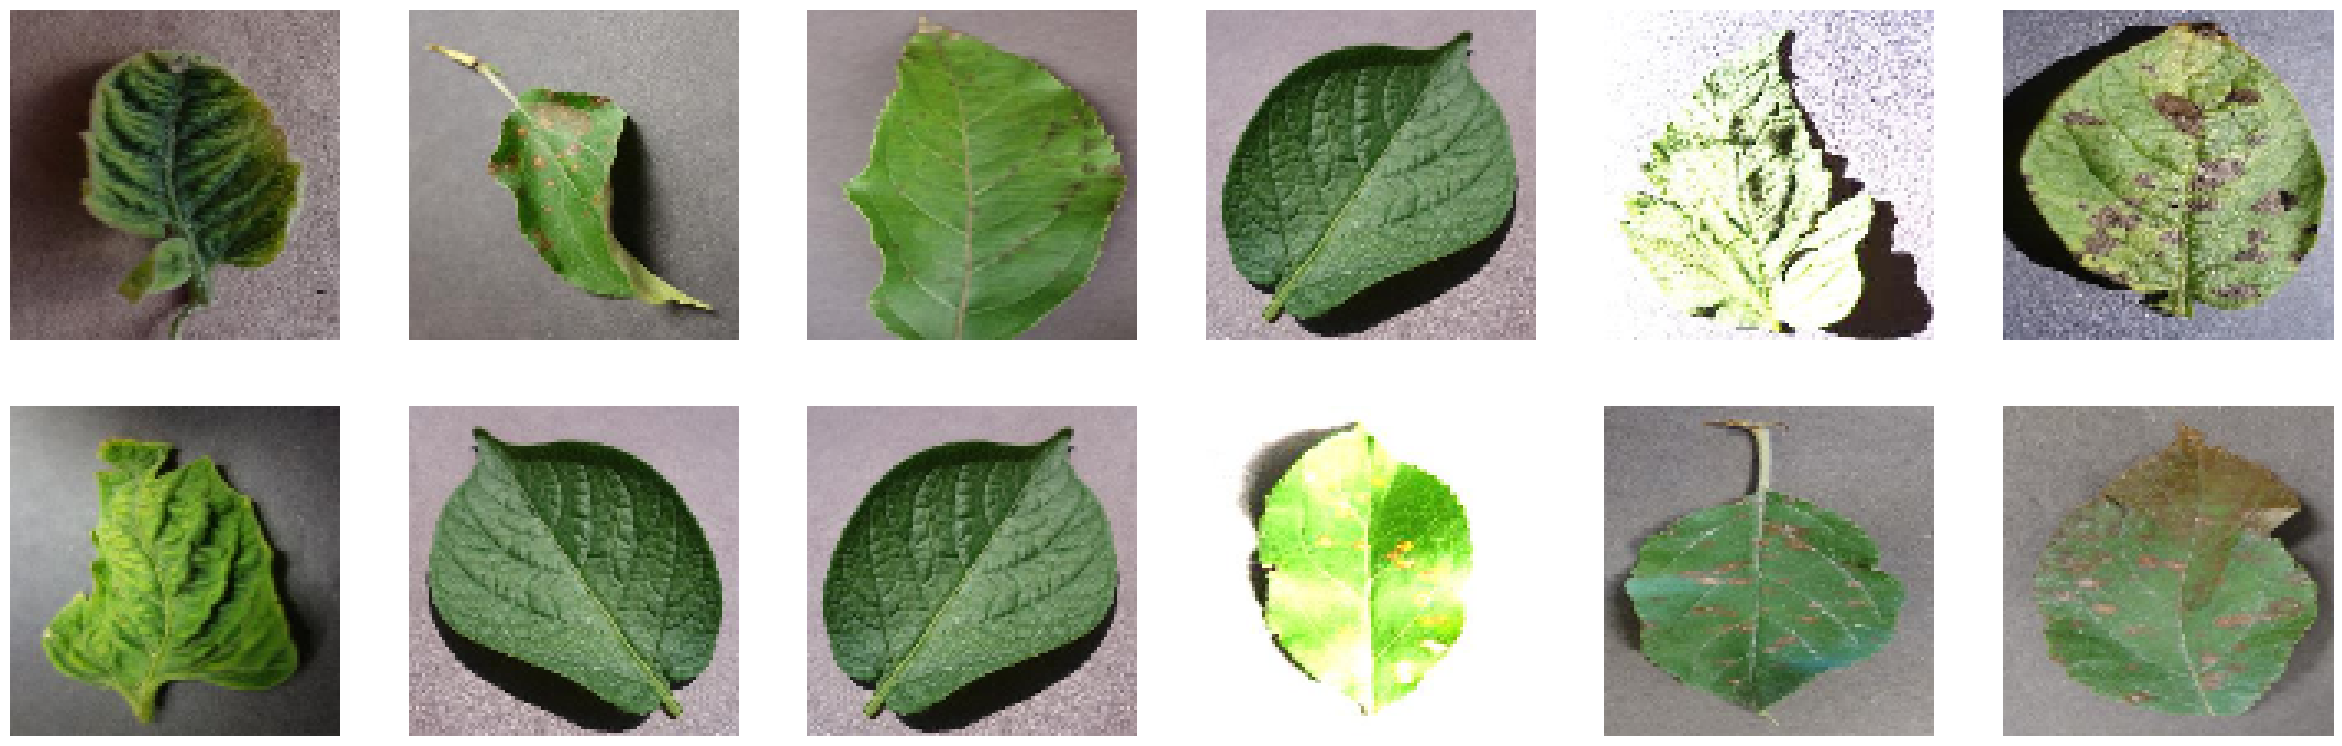

In [28]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0 , len(test_images) , 12))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(test_images[i])
    plt.axis('off')

In [29]:
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(val_images)
y_test = np.array(val_labels)
x_preds = np.array(test_images)

In [30]:
x_train = x_train.astype('float32')
x_train = x_train / 255 

x_test = x_test.astype('float32')
x_test = x_test / 255 

x_preds = x_preds.astype('float32')
x_preds = x_preds / 255 

In [31]:
print (" Shape before one-hot encoding : ", y_train.shape)
y_train= tf.keras.utils.to_categorical(y_train,len(classes))
y_test = tf.keras.utils.to_categorical(y_test,len(classes))
print (" Shape after one-hot encoding : ", y_train.shape)

 Shape before one-hot encoding :  (70295,)
 Shape after one-hot encoding :  (70295, 38)


In [32]:
model = Sequential([
    Conv2D(32 , kernel_size = (3,3) , activation='relu' , input_shape=(img_size , img_size , 3)) , 
    MaxPool2D(4,4) , 
    Conv2D(64 , kernel_size = (3,3) , activation='relu') , 
    MaxPool2D(4,4) , 
    Flatten() , 
    Dense(128 , activation='relu') , 
    Dense(len(classes) , activation = 'softmax')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [34]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
1099/1099 [==============================] - 67s 60ms/step - loss: 1.3549 - accuracy: 0.6094
Epoch 2/10
1099/1099 [==============================] - 65s 60ms/step - loss: 0.5622 - accuracy: 0.8268
Epoch 3/10
1099/1099 [==============================] - 66s 60ms/step - loss: 0.3935 - accuracy: 0.8760
Epoch 4/10
1099/1099 [==============================] - 66s 60ms/step - loss: 0.3042 - accuracy: 0.9035
Epoch 5/10
1099/1099 [==============================] - 65s 59ms/step - loss: 0.2444 - accuracy: 0.9210
Epoch 6/10
1099/1099 [==============================] - 65s 59ms/step - loss: 0.2074 - accuracy: 0.9323
Epoch 7/10
1099/1099 [==============================] - 66s 60ms/step - loss: 0.1739 - accuracy: 0.9423
Epoch 8/10
1099/1099 [==============================] - 65s 60ms/step - loss: 0.1500 - accuracy: 0.9507
Epoch 9/10
1099/1099 [==============================] - 66s 60ms/step - loss: 0.1308 - accuracy: 0.9564
Epoch 10/10
1099/1099 [==============================] - 65s 60m

In [2]:
import tensorflow as tf
from tensorflow import keras
#model.save('model.h5')
model = keras.models.load_model('model.h5')

In [37]:
print(f"The accuracy of the training set is {history.history['accuracy'][-1]:0.2f}")

The accuracy of the training set is 0.96


In [38]:
print(f"The loss of the training set is {history.history['loss'][-1]:0.2f}")

The loss of the training set is 0.11


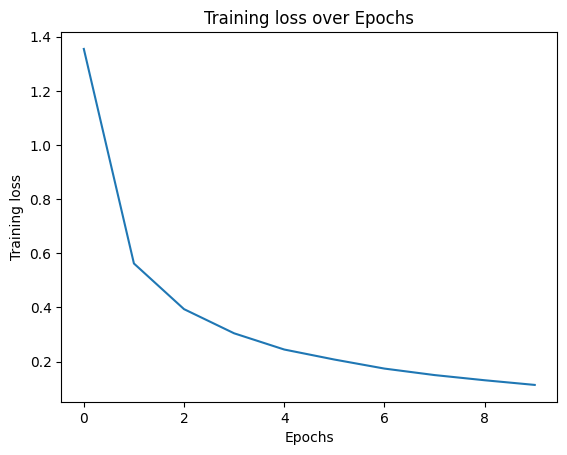

In [39]:
plt.plot(history.epoch, history.history['loss'])
plt.title('Training loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.show()

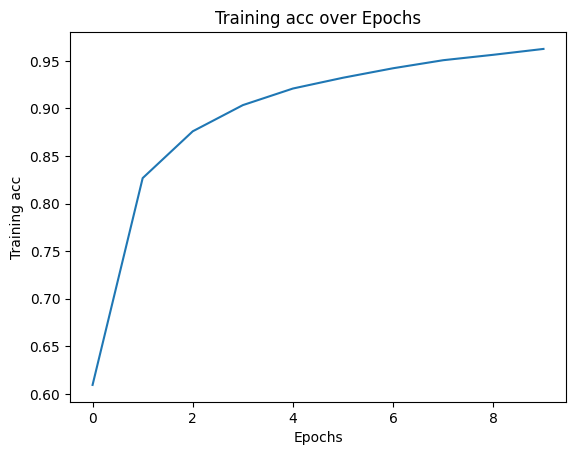

In [40]:
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Training acc over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.show()

In [41]:
test_loss , test_acc = model.evaluate(x_test,y_test)

550/550 [==============================] - 7s 12ms/step - loss: 0.2328 - accuracy: 0.9264


In [42]:
print(f"The accuracy of the testing set is : {test_acc}")

The accuracy of the testing set is : 0.9264170527458191


In [43]:
print(f"The loss of the testing set is : {test_loss}")

The loss of the testing set is : 0.23283588886260986


In [44]:
y_preds=model.predict(x_preds)

2/2 [==============================] - 0s 3ms/step


In [45]:
y_preds=y_preds.round()

In [46]:
x_preds_labels = [] 

for folder in tqdm(os.listdir(test_path)) :     
    for file in os.listdir(test_path + "/" + folder + "/") : 
        if os.path.isfile(test_path + "/" + folder + "/" + file) : 
            x_preds_labels.append(os.path.splitext(file)[0]) 

100%|██████████| 2/2 [00:00<00:00, 22.98it/s]


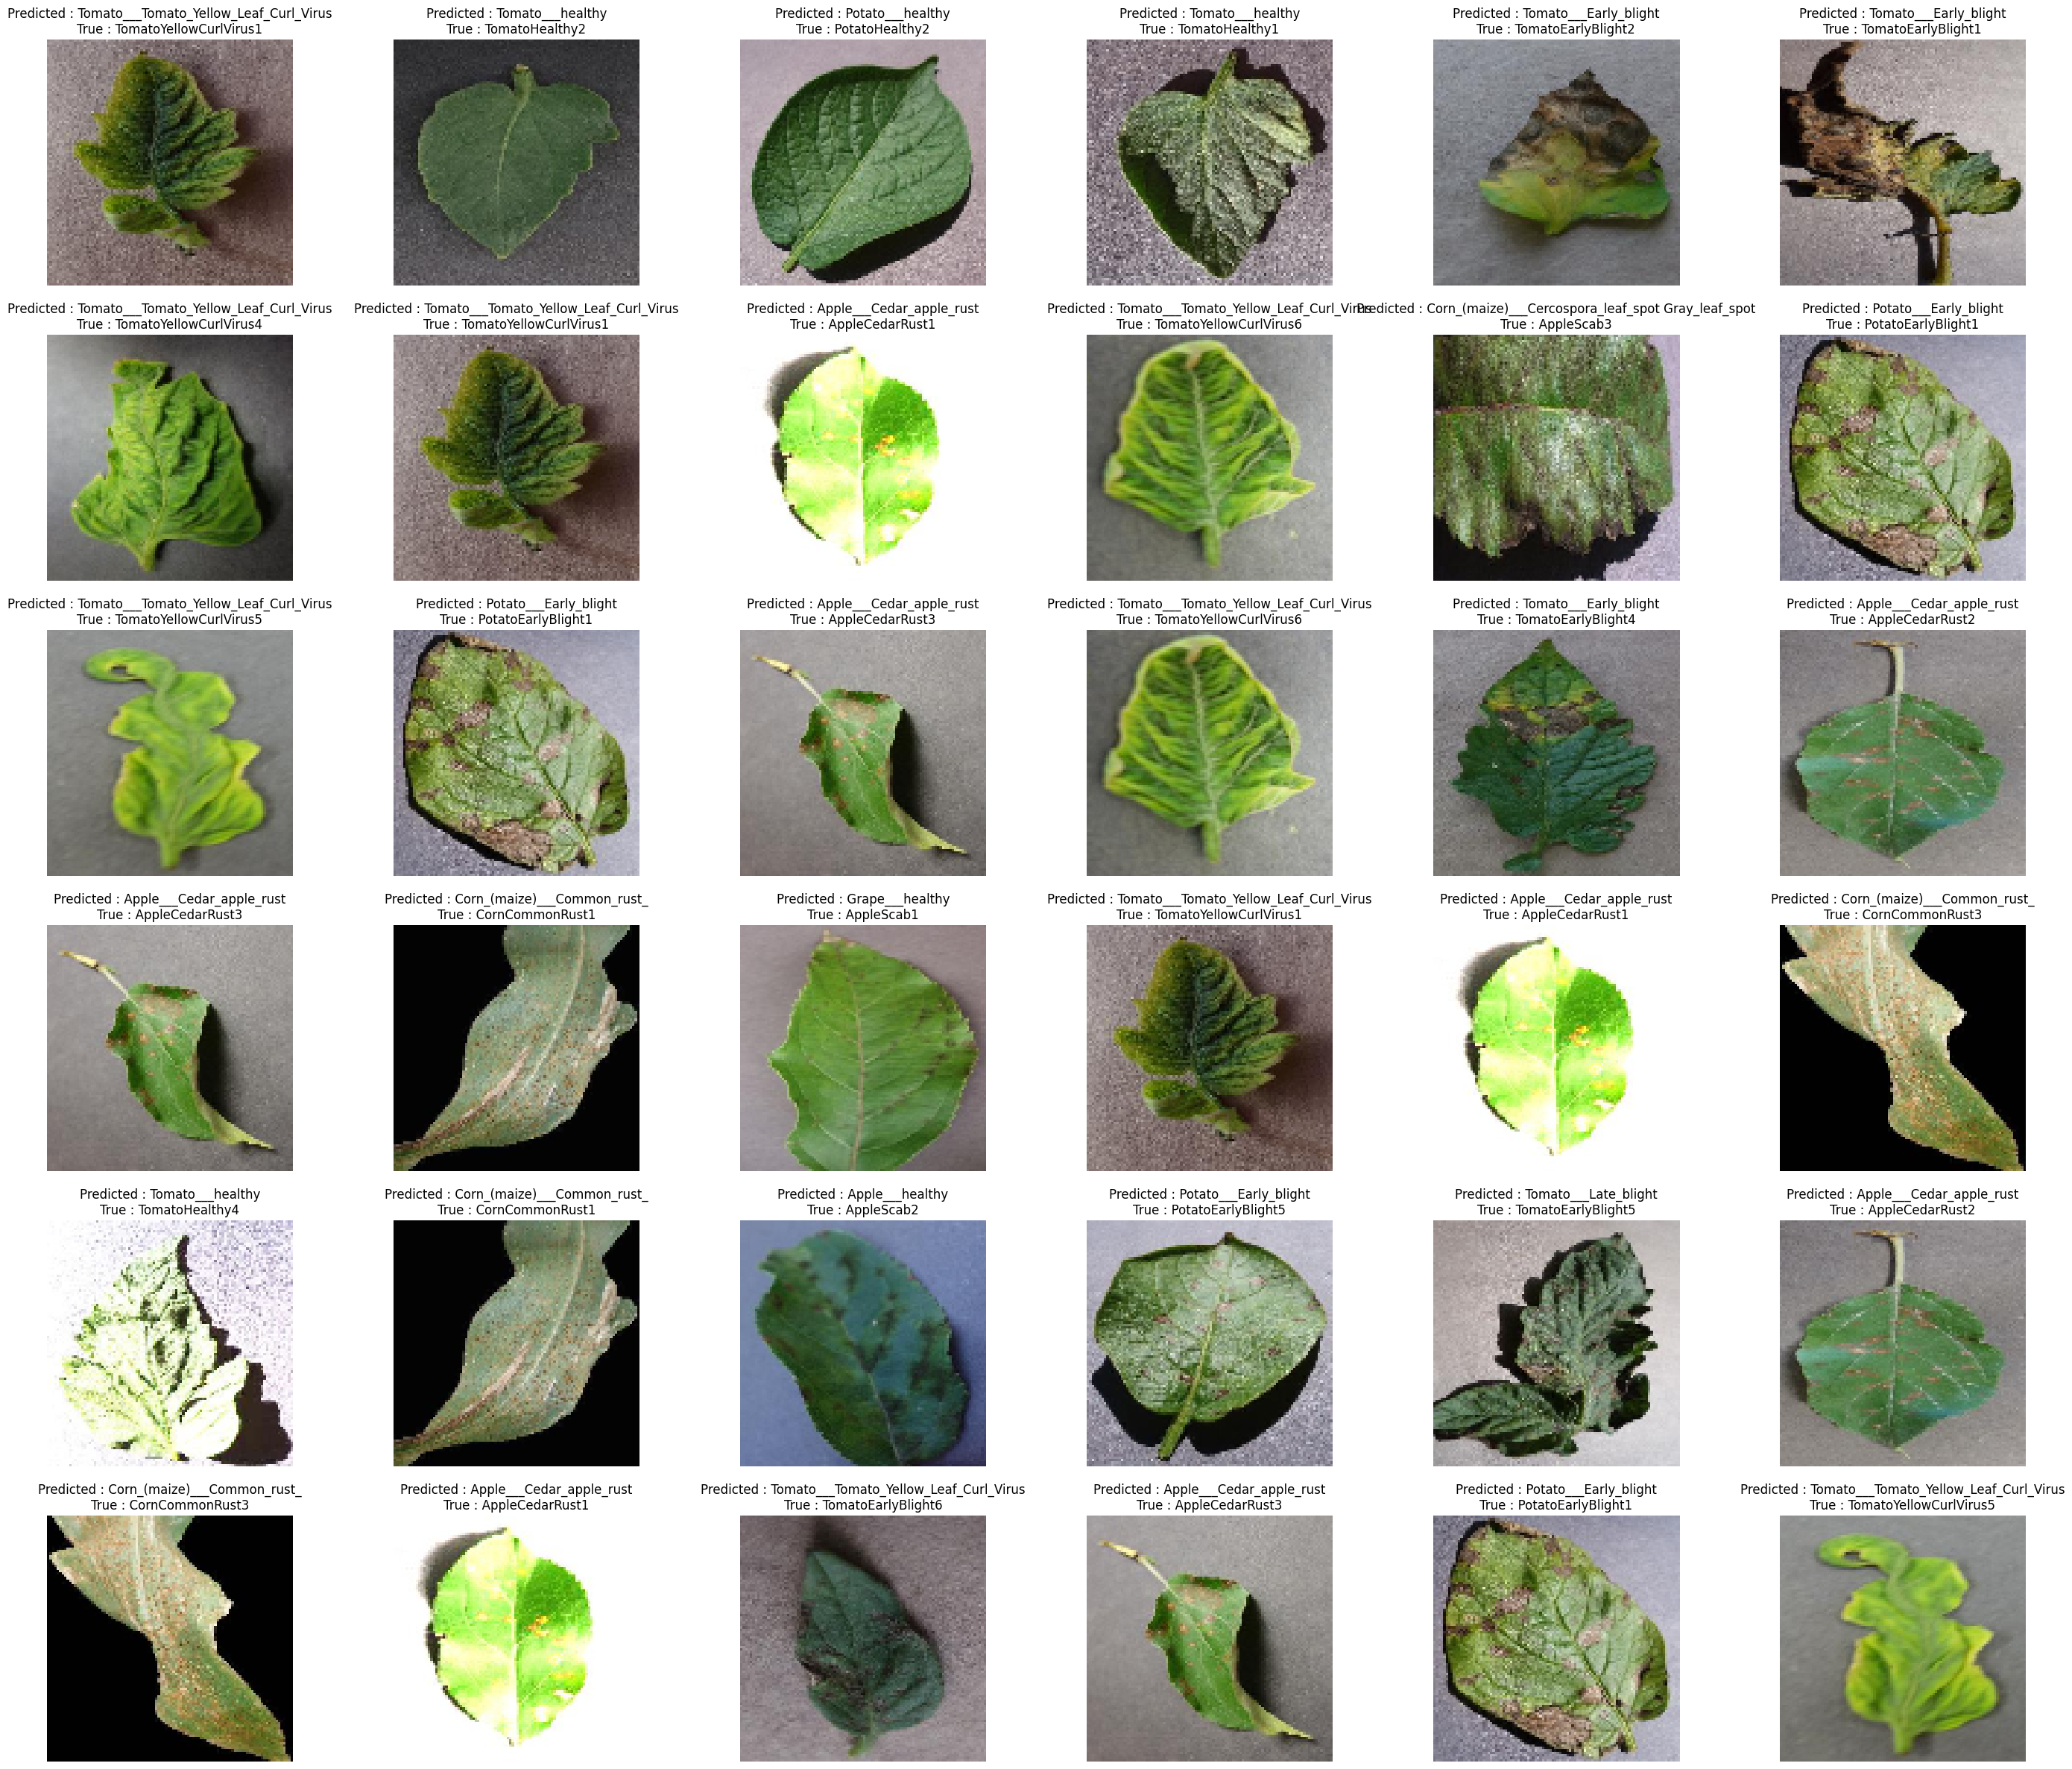

In [47]:
plt.figure(figsize=(35,30))
for n , i in enumerate(list(np.random.randint(0,len(x_preds),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_preds[i].reshape(img_size,img_size,3),cmap='gray')  
    plt.title(f"Predicted : {getlabel(y_preds[i].argmax())}\nTrue : {x_preds_labels[i]}")
    plt.axis('off')